In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

# Modelo base: Regresión Lineal
----------------------

Como se busca un modelo de regresión, realizaremos una regresión lineal sencilla para obtener el modelo base

In [2]:
# Importamos los datos

train = pd.read_csv('../data/processed/train_tratado.csv')

### Definición de variables

In [3]:
# Nombramos a 'X' y a 'y'. Quitamos las variables que no son numéricas

X = train[['Inches', 'Ram', 'Memory', 'Weight',
       '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S',
       'Windows 7', 'macOS', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Intel Celeron Dual Core', 'Intel Pentium Quad Core', 'A4', 'A6', 'A8',
       'A10', 'A12']]

y = train['Price_euros']

In [4]:
# Separamos X_train y X_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 30)
(183, 30)
(729,)
(183,)


In [5]:
# Save data

np.savez('../data/data.npz',
        X_train = X_train,
        y_train = y_train,
        X_test = X_test,
        y_test = y_test)

### Composición del modelo

In [7]:
from sklearn.linear_model import LinearRegression

#creating LinearRegression Object
model = LinearRegression()

#Training the Data Model
model.fit(X_train, y_train)

LinearRegression()

### Evaluación del modelo

c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


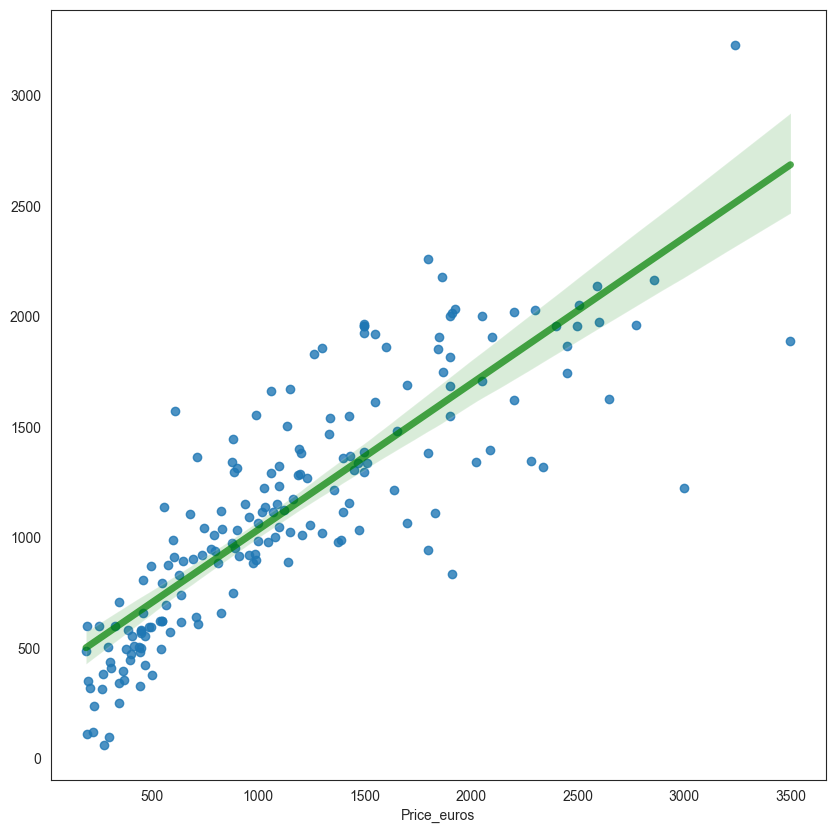

In [8]:
# Dispersión de las predicciones

plt.figure(figsize=(10,10))
sns.set_style('white')
sns.regplot(y_test, model.predict(X_test), line_kws={"color":"green","alpha":0.7,"lw":5});

### Evaluación del modelo

In [9]:
from sklearn import metrics

# Calculamos los errores
print('Train MAE:', metrics.mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE:', metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("")
print('Train MAPE:', metrics.mean_absolute_percentage_error(y_train, model.predict(X_train)))
print('Test MAPE:', metrics.mean_absolute_percentage_error(y_test, model.predict(X_test)))
print("")
print('Train MSE:', metrics.mean_squared_error(y_train, model.predict(X_train)))
print('Test MSE:', metrics.mean_squared_error(y_test, model.predict(X_test)))
print("")
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print("")
print('Train score', model.score(X_train, y_train))
print('Test score', model.score(X_test, y_test))

Train MAE: 266.09339362844696
Test MAE: 266.06475461600843

Train MAPE: 0.25920196117022587
Test MAPE: 0.28012732524375633

Train MSE: 150874.95508686014
Test MSE: 145164.85001478292

Train RMSE: 388.4262543738002
Test RMSE: 381.00505247933773

Train score 0.7075299629877951
Test score 0.7051586206607003


### Feature importance
Los coeficientes son los parámetros del modelo y no deben tomarse como ningún tipo de importancia a menos que los datos estén normalizados.

In [10]:
intercept = model.intercept_
features = pd.DataFrame(model.coef_, X_train.columns, columns=['coefficient'])
features.sort_values('coefficient', ascending=False)

,coefficient
Workstation,625.292953
Windows 7,358.896169
Intel Core i7,261.366701
Touchscreen,220.912046
macOS,210.962704
Intel Core i5,145.420425
Weight,140.629567
Ultrabook,79.766370
Ram,74.184719
Mac OS X,34.289608


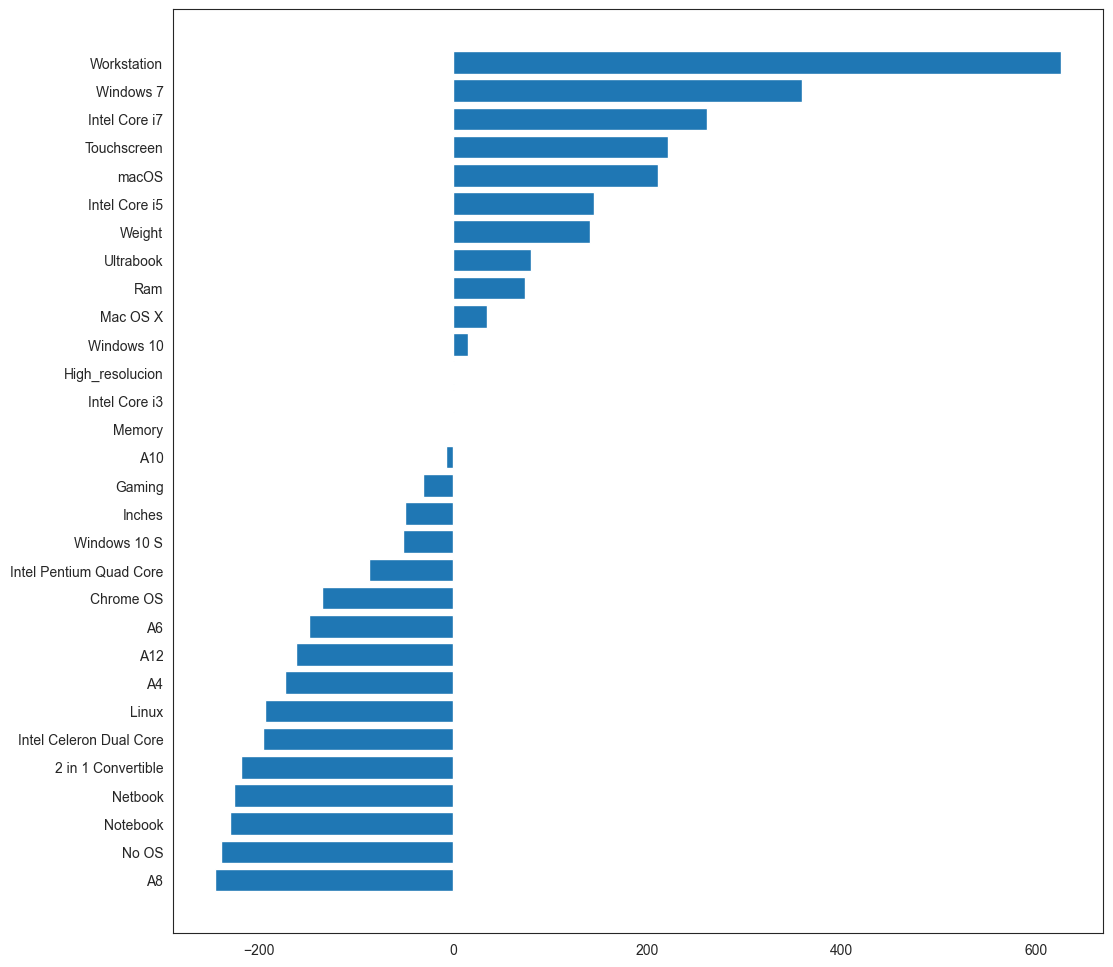

In [11]:
plt.figure(figsize=(12, 12))
features = features.sort_values('coefficient', ascending=True)
plt.barh(features.index, features.coefficient);

### Guardamos el modelo

In [12]:
import pickle

pickle.dump(model, open('../model/modelo_base', 'wb'))

### Conclusión

Una Regresión Lineal - el modelo base - tiene un RMSE de 381,01.


# Regresión Lineal con cargas polinómicas
----------------------

In [13]:
from sklearn.preprocessing import PolynomialFeatures

### Aplicamos diferentes cargas polinómicas

In [18]:
poly_reg_2 = PolynomialFeatures(degree = 2)
poly_reg_2.fit(X_train)
pol_reg_2 = LinearRegression()
pol_reg_2.fit(poly_reg_2.transform(X_train), y_train)

poly_reg_3 = PolynomialFeatures(degree = 3)
poly_reg_3.fit(X_train)
pol_reg_3 = LinearRegression()
pol_reg_3.fit(poly_reg_3.transform(X_train), y_train)

poly_reg_4 = PolynomialFeatures(degree = 4)
poly_reg_4.fit(X_train)
pol_reg_4 = LinearRegression()
pol_reg_4.fit(poly_reg_4.transform(X_train), y_train)

LinearRegression()

### Evaluación del modelo

In [15]:
def comparation_chart(names, valores):
    # Set styles for axes
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    # Plot
    fig, ax = plt.subplots(figsize=(12,5))
    plt.hlines(names, xmin=0, xmax=valores, color='#007acc', alpha=0.5, linewidth=5)

    plt.xticks(rotation=90)
    plt.plot(valores, names, "o", markersize=5, color='#007acc', alpha=0.9)
    plt.title('Models\' comparation')
    plt.xlabel('RMSE')
    plt.show()

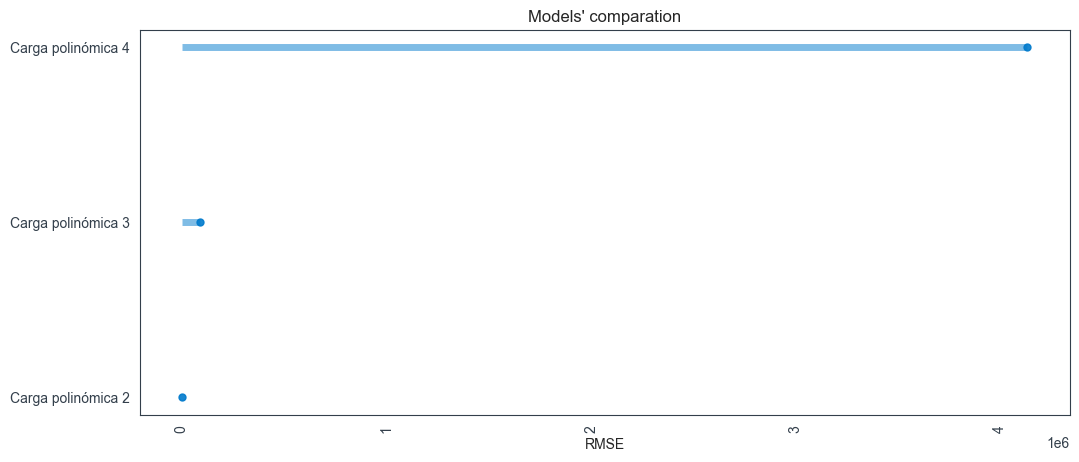

In [19]:
models = ['Carga polinómica 2', 'Carga polinómica 3', 'Carga polinómica 4']
RMSE = [np.sqrt(metrics.mean_squared_error(y_test, pol_reg_2.predict(poly_reg_2.fit_transform(X_test)))), 
        np.sqrt(metrics.mean_squared_error(y_test, pol_reg_3.predict(poly_reg_3.fit_transform(X_test)))), 
        np.sqrt(metrics.mean_squared_error(y_test, pol_reg_4.predict(poly_reg_4.fit_transform(X_test)))),
        ]

comparation_chart(models, RMSE)

### Conclusión

La carga polinómica con menor error ante datos nuevos es 2.

Aún así, cuando aplicamos carga polinómica, la Regresión Lineal cae en overfitting y generaliza peor que con una Regresión Lineal simple.

Descartamos la opción de aplicar carga polinómica.

# Regresión Lineal con regularización
----------------------

Para tratar de optimizar el modelo base, aplicamos Regularización.

### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
from sklearn import metrics

alpha = 1000**np.linspace(-10, 2, 500)
error_array = np.zeros(len(alpha))
for idx, a in enumerate(alpha):
  ridge_regression = Ridge(alpha=a)
  ridge_regression.fit(X_train, y_train)
  error_array[idx] = metrics.mean_absolute_percentage_error(y_test, ridge_regression.predict(X_test))

# Optimal alpha
smallest_error = np.min(error_array)
optimal_alpha = alpha[np.argmin(error_array)]
print(f'El valor óptimo de alpha es: {np.round(optimal_alpha, 2)}, con el que se obtiene un error de {np.round(smallest_error, 2)}')

c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.06002e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.92588e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.30248e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.21731e-22): result may not be accurate.
  return linalg.solve(A, Xy, sy

El valor óptimo de alpha es: 2.0, con el que se obtiene un error de 0.28


### Lasso

In [21]:
from sklearn.linear_model import Lasso

error_lasso = np.zeros(len(alpha))
for idx, a in enumerate(alpha):
  # Lasso regression
  lasso_regression = Lasso(alpha=a)
  lasso_regression.fit(X_train, y_train)
  prediction = lasso_regression.predict(X_test)
  error_lasso[idx] = metrics.mean_absolute_percentage_error(y_test, prediction)

# Optimal alpha lasso
smallest_error_lasso = np.min(error_lasso)
optimal_alpha_lasso = alpha[np.argmin(error_lasso)]

print(f'El valor óptimo de alpha es: {np.round(optimal_alpha_lasso, 2)}, con el que se obtiene un error de {np.round(smallest_error_lasso, 2)}')

c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.499e+07, tolerance: 3.761e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.499e+07, tolerance: 3.761e+04 Linear regression models with null weight for the l1 regularization ter

El valor óptimo de alpha es: 1.43, con el que se obtiene un error de 0.28


### Elastic Net

In [22]:
from sklearn.linear_model import ElasticNet

error_e_net = np.zeros(len(alpha))
for idx, a in enumerate(alpha):
  # Elastic net regression
  e_net_regression = ElasticNet(alpha=a)
  e_net_regression.fit(X_train, y_train)
  error_e_net[idx] = metrics.mean_absolute_percentage_error(y_test, e_net_regression.predict(X_test))

# Optimal alpha lasso
smallest_error_e_net = np.min(error_e_net)
optimal_alpha_e_net = alpha[np.argmin(error_e_net)]

print(f'El valor óptimo de alpha es: {np.round(optimal_alpha_e_net, 2)}, con el que se obtiene un error de {np.round(smallest_error_e_net, 2)}')

c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.499e+07, tolerance: 3.761e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\gonza\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.499e+07, tolerance: 3.761e+04 Linear regression models with null weight for the l1 regularization ter

El valor óptimo de alpha es: 0.01, con el que se obtiene un error de 0.28


### Conclusión:
Ningún estilo de regularización mejora el modelo.



__Explicación__ :
En general, la _Ridge Regression_ no mejorará necesariamente el error. Recuerde que el objetivo de la regularización es hacer un modelo más simple para evitar el _overfitting_ y, por lo tanto, una mejor predicción ante datosnuevos. Sin embargo, si el _overfitting_ no es un problema (por ejemplo, cuando hay muchas más muestras que características), un modelo más complejo (menos regularizado) podría predecir mejor. A menudo, los modelos predicen mejor cuando son más complejos y no menos, por lo que existen modelos como redes neuronales, bosques aleatorios y kernels.


# Simplificación del modelo de Regresión Lineal
----------------------

En primer lugar, vemos que no hay _overfitting_, por tanto la regularización ni la carga polinómica mejoran el modelo. Por ende, veremos si hay _underfitting_ y podemos mejorar el modelo.

Cierta multicolinearidad presente en dos columnas ('2 in 1 Convertible' & 'Touchscreen' ). Por ende, como '2 in 1 Convertible' tiene menor correlación con nuestra target, la borramos del dataset.

El punto óptimo de menor error en test es cuando consideramos únicamente las variables que afectan en nuestra predicción en más del 9%, que acorde a la matriz de correlación son:
- Ram (0.74)
- Notebook (-0.53)
- Gaming (0.37)
- High_resolution (0.36)
- Ultrabook (0.24)
- Weight (0.24)
- Workstation (0.23)
- Touchscreen (0.21)
- Memory (0.14)
- Netbook (-0.12)
- Chrome OS (-0.13)
- Linux (-0.16)
- No OS (-0.17)
- Windows 10 (0.12)
- Windows 7 (0.14)
- macOS (0.091)

In [24]:
X = train[['Ram', 'Memory', 'Weight',
       'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Touchscreen', 'High_resolucion',
       'Chrome OS', 'Linux', 'No OS', 'Windows 10', 
       'Windows 7', 'macOS', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Intel Celeron Dual Core', 'Intel Pentium Quad Core', 'A4', 'A6', 'A8',
       'A10', 'A12']]



y = train['Price_euros']

# Separamos X_train y X_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

from sklearn.linear_model import LinearRegression
#creating LinearRegression Object
model_s = LinearRegression()

#Training the Data Model
model_s.fit(X_train, y_train)

from sklearn import metrics
# Calculamos los errores

print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model_s.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_s.predict(X_test))))
print("")


Train RMSE: 389.7770537460272
Test RMSE: 379.13567954866886



### Guardamos el modelo

In [ ]:
import pickle

pickle.dump(model, open('../model/modelo_simplificado', 'wb'))

### Conclusión

Efectviamente, nos enfrentamos a un caso de _underdifitting_, por ende, simplicando nuestro modelo es cómo obtenemos el mejor rendimiento ante datos nuevos.